**we utilized the xGBoost model to analyze a survey conducted among a selected customer cohort.**

Imported Libraries:
Libraries such as NumPy, pandas, Matplotlib, and Seaborn were imported for data processing and visualization.

Data Loading:
Loaded the ACME-HappinessSurvey2020 CSV file into a DataFrame named train_data.

Basic Data Exploration:

Displayed the initial rows.
Checked data types, general information, and summary statistics.
Looked for missing values and data types.
Data Visualization:

* Observed the distribution of individual features with histograms.
* Understood distribution and potential outliers using box plots.
* Visualized the target variable through a bar chart.
Feature Engineering:

Created new features by combining and calculating various attributes, such as 'overall_satisfaction', 'service_satisfaction', 'order_content_satisfaction', 'price_app_satisfaction', and 'average_score'.
Data Correlation Analysis:
Generated and visualized a correlation matrix using a heatmap to find relationships between different features.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X3 = I ordered everything I w.anted to order
* X4 = I paid a good price for my order
* X5 = I am satisfied with my courier
* X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.******

In [221]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
train_data = pd.read_csv("/kaggle/input/happinesssurvey/ACME-HappinessSurvey2020.csv")

In [223]:
train_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [224]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [225]:
train_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [226]:
# Check for missing values
train_data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [227]:
# Check the data types
train_data.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

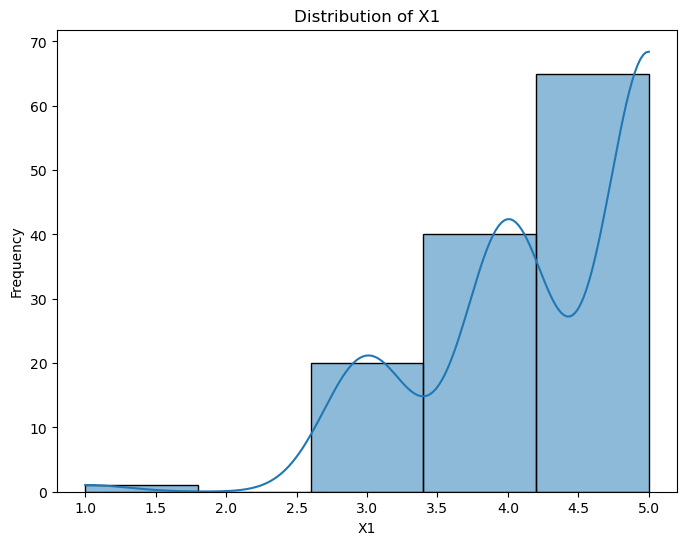

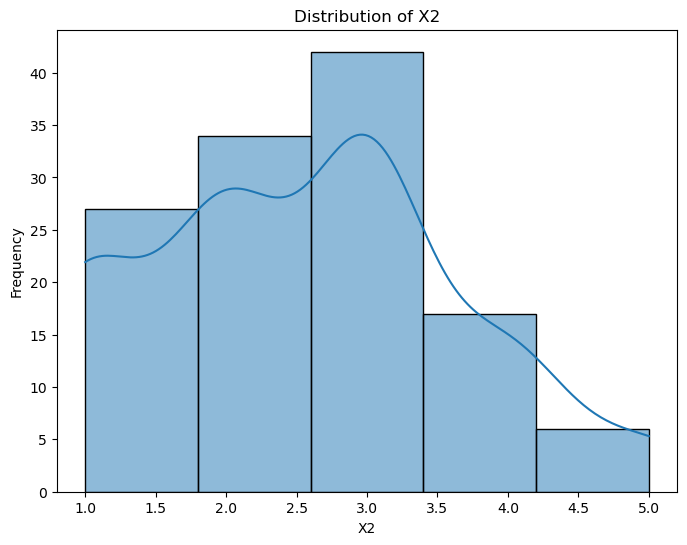

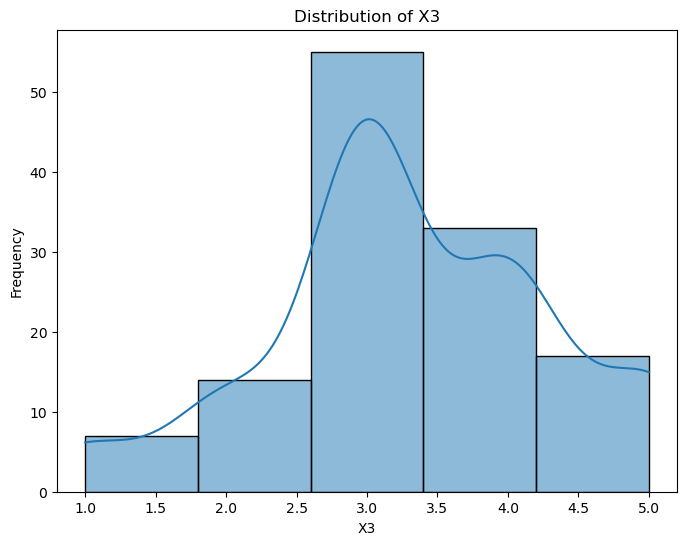

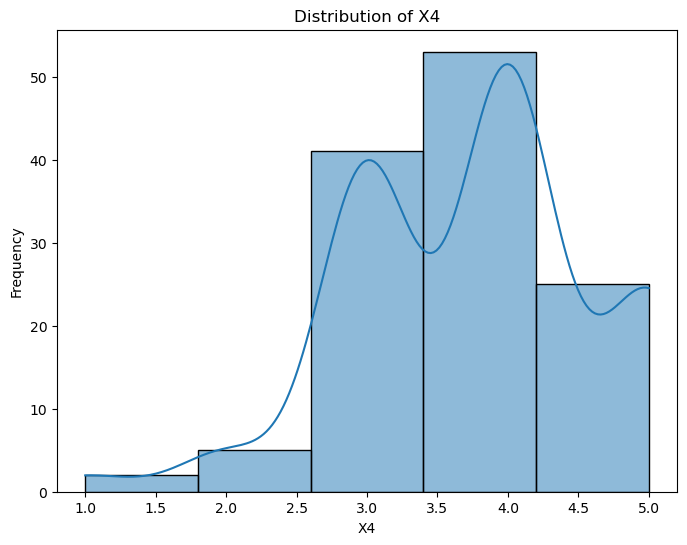

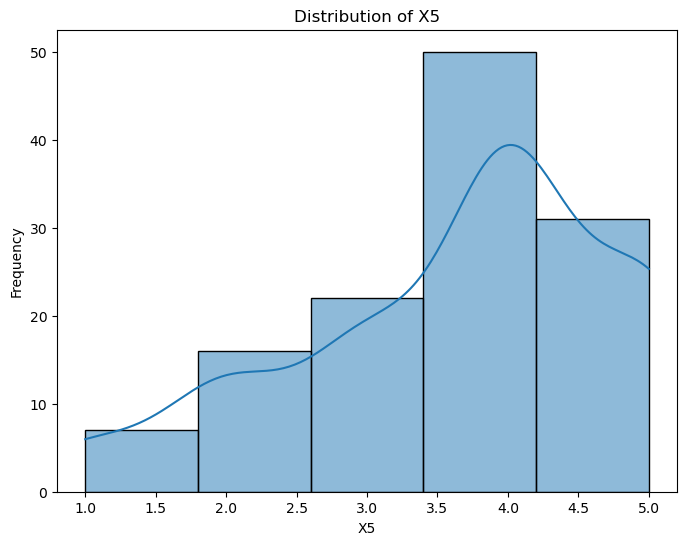

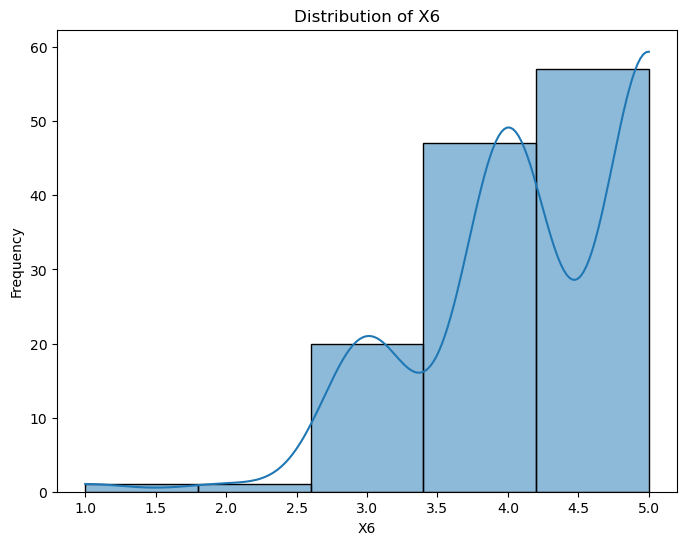

In [228]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True, bins=5) # bins=5 since the values range from 1 to 5
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

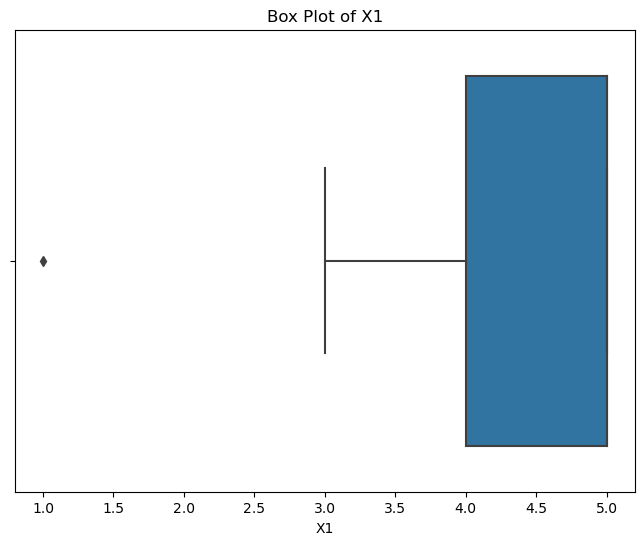

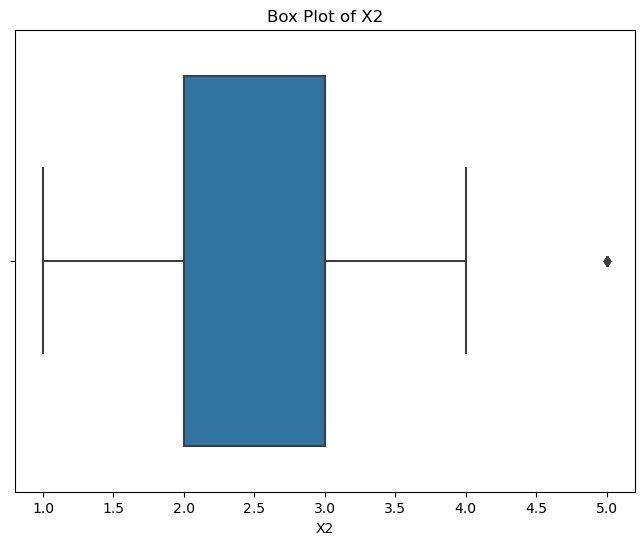

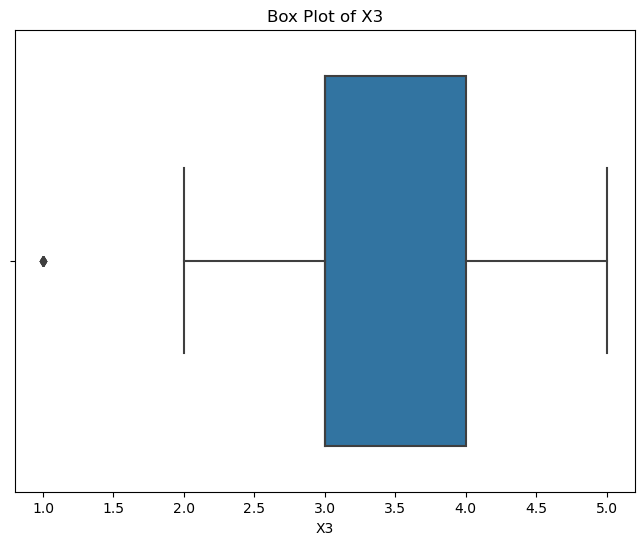

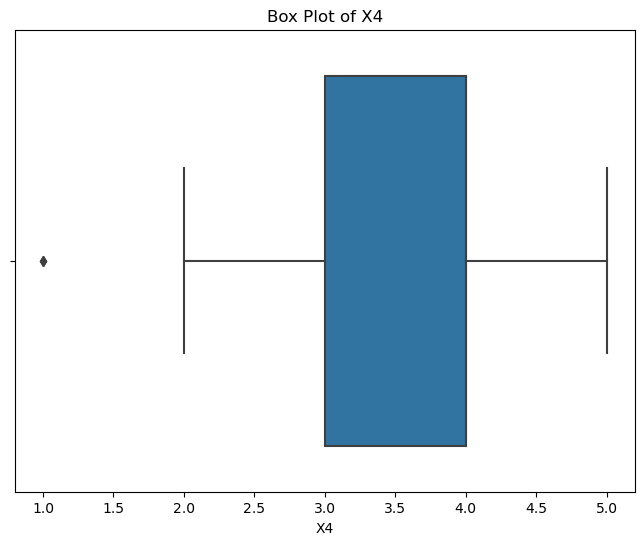

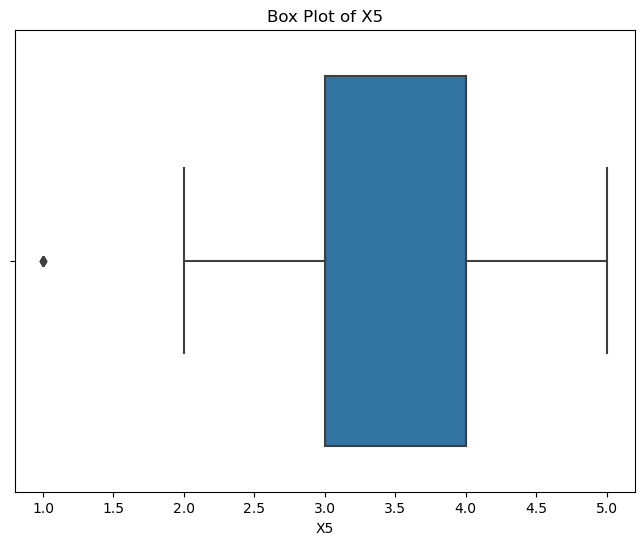

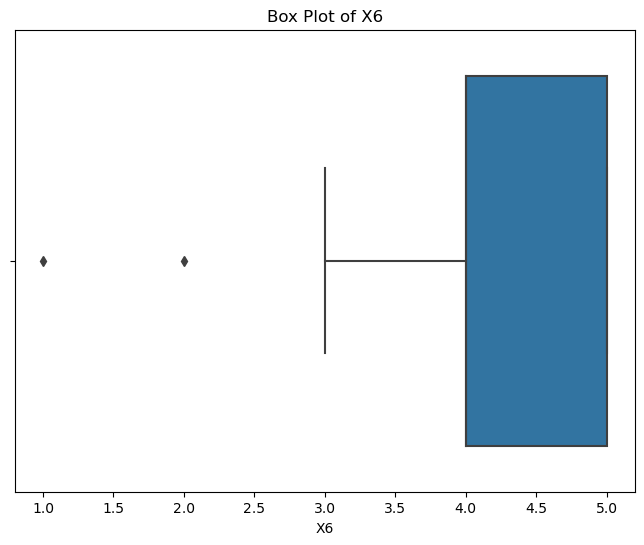

In [229]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

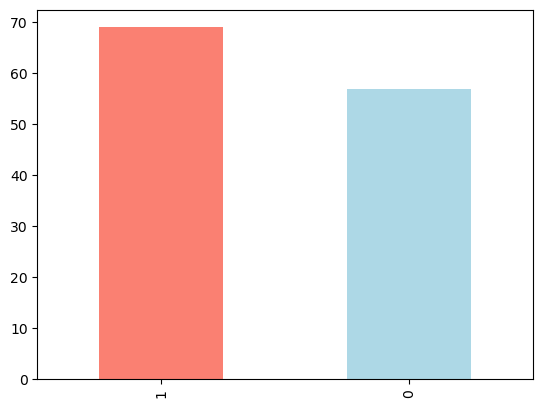

In [230]:
train_data.Y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [232]:
#A simple summation of all the features might give an overall view of the satisfaction level.
train_data['overall_satisfaction'] = train_data['X1'] + train_data['X2'] + train_data['X3'] + train_data['X4'] + train_data['X5'] + train_data['X6']

In [233]:
#Combining X1 (delivery on time) and X5 (satisfaction with courier) might give an insight into satisfaction with the delivery service.
train_data['service_satisfaction'] = train_data['X1'] + train_data['X5']

In [234]:
#This could be a combination of X2 (order contents as expected) and X3 (everything wanted was ordered), reflecting satisfaction with what was received.
train_data['order_content_satisfaction'] = train_data['X2'] + train_data['X3']

In [235]:
#Combining X4 (good price) and X6 (easy ordering via the app) might capture the customer's satisfaction with the economic aspects and user experience.
train_data['price_app_satisfaction'] = train_data['X4'] + train_data['X6']

In [236]:
#You might also consider the average score across all categories, which can be a more balanced representation if you want to avoid having the total score skewed by the number of categories.
train_data['average_score'] = train_data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].mean(axis=1)

In [237]:
train_data.head()

,Y,X1,X2,X3,X4,X5,X6,overall_satisfaction,service_satisfaction,order_content_satisfaction,price_app_satisfaction,average_score
0,0,3,3,3,4,2,4,19,5,6,8,3.166667
1,0,3,2,3,5,4,3,20,7,5,8,3.333333
2,1,5,3,3,3,3,5,22,8,6,8,3.666667
3,0,5,4,3,3,3,5,23,8,7,8,3.833333
4,0,5,4,3,3,3,5,23,8,7,8,3.833333


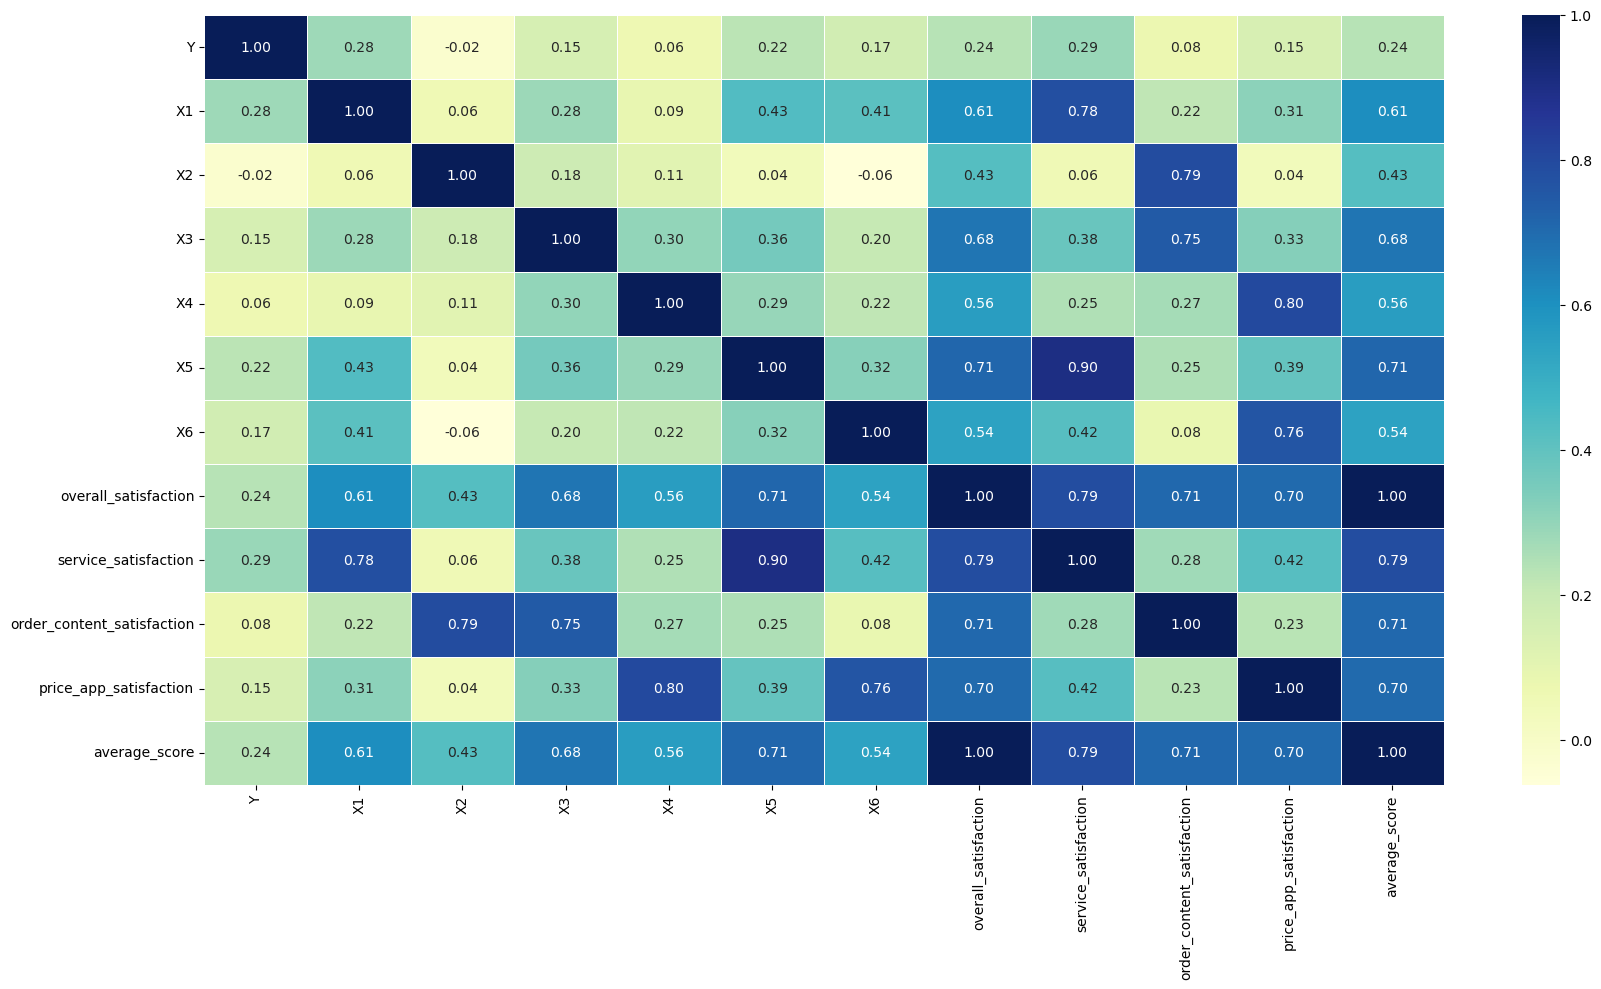

In [238]:
corr_matrix = train_data.corr()
plt.figure(figsize=(20.0,10.0))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [239]:
train_data.shape

(126, 12)

In [240]:
#adding aggregation features
features_to_aggregate = ['X1', 'service_satisfaction']

for feature in features_to_aggregate:
    train_data[f'{feature}_mean'] = train_data[feature].mean()
    train_data[f'{feature}_std'] = train_data[feature].std()
    train_data[f'{feature}_min'] = train_data[feature].min()
    train_data[f'{feature}_max'] = train_data[feature].max()

In [241]:
train_data.head()

,Y,X1,X2,X3,X4,X5,X6,overall_satisfaction,service_satisfaction,order_content_satisfaction,price_app_satisfaction,average_score,X1_mean,X1_std,X1_min,X1_max,service_satisfaction_mean,service_satisfaction_std,service_satisfaction_min,service_satisfaction_max
0,0,3,3,3,4,2,4,19,5,6,8,3.166667,4.333333,0.8,1,5,7.984127,1.658839,2,10
1,0,3,2,3,5,4,3,20,7,5,8,3.333333,4.333333,0.8,1,5,7.984127,1.658839,2,10
2,1,5,3,3,3,3,5,22,8,6,8,3.666667,4.333333,0.8,1,5,7.984127,1.658839,2,10
3,0,5,4,3,3,3,5,23,8,7,8,3.833333,4.333333,0.8,1,5,7.984127,1.658839,2,10
4,0,5,4,3,3,3,5,23,8,7,8,3.833333,4.333333,0.8,1,5,7.984127,1.658839,2,10


In [242]:
# # List of columns to drop
# columns_to_drop = ['X3', 'X4', 'X5', 'order_content_satisfaction', 'price_app_satisfaction', 'average_score']

# # Check for any additional X1-related aggregations that might exist in your DataFrame
# # and add them to the list of columns to drop
# for col in train_data.columns:
#     if 'X1' in col and col != 'X1':
#         columns_to_drop.append(col)

# # Drop the specified columns
# train_data = train_data.drop(columns=columns_to_drop)




In [243]:
# Verify that the columns were dropped
train_data.head()

,Y,X1,X2,X3,X4,X5,X6,overall_satisfaction,service_satisfaction,order_content_satisfaction,price_app_satisfaction,average_score,X1_mean,X1_std,X1_min,X1_max,service_satisfaction_mean,service_satisfaction_std,service_satisfaction_min,service_satisfaction_max
0,0,3,3,3,4,2,4,19,5,6,8,3.166667,4.333333,0.8,1,5,7.984127,1.658839,2,10
1,0,3,2,3,5,4,3,20,7,5,8,3.333333,4.333333,0.8,1,5,7.984127,1.658839,2,10
2,1,5,3,3,3,3,5,22,8,6,8,3.666667,4.333333,0.8,1,5,7.984127,1.658839,2,10
3,0,5,4,3,3,3,5,23,8,7,8,3.833333,4.333333,0.8,1,5,7.984127,1.658839,2,10
4,0,5,4,3,3,3,5,23,8,7,8,3.833333,4.333333,0.8,1,5,7.984127,1.658839,2,10


In [251]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

X = train_data.drop(columns=['Y'])
y = train_data['Y']

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

for train_index, val_index in strat_k_fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    scores['accuracy'].append(accuracy_score(y_val, y_pred))
    scores['precision'].append(precision_score(y_val, y_pred))
    scores['recall'].append(recall_score(y_val, y_pred))
    scores['f1'].append(f1_score(y_val, y_pred))

print("Mean Accuracy: ", np.mean(scores['accuracy']))
print("Mean Precision: ", np.mean(scores['precision']))
print("Mean Recall: ", np.mean(scores['recall']))
print("Mean F1 Score: ", np.mean(scores['f1']))

Mean Accuracy:  0.6107692307692308
Mean Precision:  0.643110661268556
Mean Recall:  0.6538461538461539
Mean F1 Score:  0.6397958363475604


In [252]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

X = train_data.drop(columns=['Y'])
y = train_data['Y']

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

for train_index, val_index in strat_k_fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestClassifier(random_state=42) # Changed to Random Forest
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    scores['accuracy'].append(accuracy_score(y_val, y_pred))
    scores['precision'].append(precision_score(y_val, y_pred))
    scores['recall'].append(recall_score(y_val, y_pred))
    scores['f1'].append(f1_score(y_val, y_pred))

print("Mean Accuracy: ", np.mean(scores['accuracy']))
print("Mean Precision: ", np.mean(scores['precision']))
print("Mean Recall: ", np.mean(scores['recall']))
print("Mean F1 Score: ", np.mean(scores['f1']))

Mean Accuracy:  0.6264615384615385
Mean Precision:  0.6682405313984261
Mean Recall:  0.6384615384615384
Mean F1 Score:  0.6431210528601834


In [246]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [253]:
import optuna
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    X = train_data.drop(columns=['Y'])
    y = train_data['Y']
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy_scores = []
    val_accuracy_scores = []

    for train_index, val_index in strat_k_fold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 1, 20),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
            'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
        }

        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        
        # Calculating accuracy on training set
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        train_accuracy_scores.append(train_accuracy)

        # Calculating accuracy on validation set
        val_accuracy = accuracy_score(y_val, model.predict(X_val))
        val_accuracy_scores.append(val_accuracy)

    print("Train Accuracy: ", np.mean(train_accuracy_scores))
    print("Validation Accuracy: ", np.mean(val_accuracy_scores))

    return np.mean(val_accuracy_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-08-19 15:42:37,046] A new study created in memory with name: no-name-1072eda5-3c7c-434f-a0ae-30720aef0df9
/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'co

Train Accuracy:  0.9027524752475248
Validation Accuracy:  0.5947692307692308


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.8332871287128713
Validation Accuracy:  0.6104615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.892831683168317
Validation Accuracy:  0.6267692307692309


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7242772277227723
Validation Accuracy:  0.6513846153846153


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6726336633663367
Validation Accuracy:  0.6347692307692308


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6567920792079208
Validation Accuracy:  0.5953846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6468514851485149
Validation Accuracy:  0.5796923076923077


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.624950495049505
Validation Accuracy:  0.6187692307692308


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7321782178217822
Validation Accuracy:  0.6113846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7995841584158416
Validation Accuracy:  0.6033846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6507524752475249
Validation Accuracy:  0.6347692307692309


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.5476237623762377
Validation Accuracy:  0.5476923076923077


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6507920792079209
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6467920792079209
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7003762376237622
Validation Accuracy:  0.6199999999999999


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.646831683168317
Validation Accuracy:  0.6113846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.8451881188118812
Validation Accuracy:  0.5953846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6726732673267327
Validation Accuracy:  0.6264615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.9364752475247524
Validation Accuracy:  0.6190769230769232


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6627128712871289
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6983762376237623
Validation Accuracy:  0.6043076923076923


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6587326732673268
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6567722772277229
Validation Accuracy:  0.6347692307692308


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.8135049504950495
Validation Accuracy:  0.5870769230769232


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6725940594059406
Validation Accuracy:  0.6196923076923077


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6487722772277229
Validation Accuracy:  0.6113846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.640851485148515
Validation Accuracy:  0.6267692307692309


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.874950495049505
Validation Accuracy:  0.5953846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6487920792079208
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6607326732673269
Validation Accuracy:  0.6036923076923078


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6825742574257426
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.876950495049505
Validation Accuracy:  0.5636923076923077


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7122772277227721
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6607128712871287
Validation Accuracy:  0.6193846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7163366336633663
Validation Accuracy:  0.6356923076923078


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6567524752475248
Validation Accuracy:  0.6270769230769231


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6567128712871287
Validation Accuracy:  0.6347692307692308


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.7063564356435644
Validation Accuracy:  0.5876923076923077


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6567722772277229
Validation Accuracy:  0.6033846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6587326732673268
Validation Accuracy:  0.6350769230769231


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6607524752475248
Validation Accuracy:  0.6110769230769231


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6113846153846154


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.6527524752475248
Validation Accuracy:  0.6424615384615385


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.870990099009901
Validation Accuracy:  0.6590769230769231


/tmp/ipykernel_32/362252411.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_32/362252411.py:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.py:23: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
/tmp/ipykernel_32/362252411.p

Train Accuracy:  0.8174851485148513
Validation Accuracy:  0.5876923076923077
Number of finished trials:  50
Best trial:
Value:  0.6590769230769231
Params: 
    learning_rate: 0.9685853779129823
    n_estimators: 849
    max_depth: 12
    min_child_weight: 4
    subsample: 1.0
    colsample_bytree: 0.8


In [254]:
importance = model.feature_importances_
for feature_name, importance_score in zip(X.columns, importance):
    print(f"Feature: {feature_name} - Importance: {importance_score}")

Feature: X1 - Importance: 0.08313020060326358
Feature: X2 - Importance: 0.09226819125206474
Feature: X3 - Importance: 0.0809476240978126
Feature: X4 - Importance: 0.07843446434820353
Feature: X5 - Importance: 0.07368081205241252
Feature: X6 - Importance: 0.07610772615477641
Feature: overall_satisfaction - Importance: 0.10402567088207339
Feature: service_satisfaction - Importance: 0.1247005504312155
Feature: order_content_satisfaction - Importance: 0.09992016079547657
Feature: price_app_satisfaction - Importance: 0.07963774255086242
Feature: average_score - Importance: 0.10714685683183883
Feature: X1_mean - Importance: 0.0
Feature: X1_std - Importance: 0.0
Feature: X1_min - Importance: 0.0
Feature: X1_max - Importance: 0.0
Feature: service_satisfaction_mean - Importance: 0.0
Feature: service_satisfaction_std - Importance: 0.0
Feature: service_satisfaction_min - Importance: 0.0
Feature: service_satisfaction_max - Importance: 0.0


Summary:
* Original Features (X1 to X6): All six original questions have non-zero importance, with values ranging from 0.0737 (X5) to 0.0923 (X2). Each question contributes to the model, though their importance is relatively balanced.
* Overall Satisfaction: This feature, representing the sum of all original features, has a noticeable importance of 0.1040.
* Service Satisfaction: The combined satisfaction with delivery and courier, with an importance of 0.1247, is the most significant factor.
* Order Content and Price App Satisfaction: These combined features hold importances of 0.0999 and 0.0796 respectively.
* Average Score: The mean of the original features has a substantial importance of 0.1071.
* Aggregated Features: X1 and service satisfaction-related aggregations (mean, std, min, max) have zero importance and don't contribute to the model.